# Single Variable Linear Regression Model

## General Setup

In [1]:
# Dependencies and setup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.formula.api as sm
%matplotlib inline

In [2]:
# Set maximum rows to a high number
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Load dataset
training_data = pd.read_csv("01-raw_data/train.csv",index_col=0)

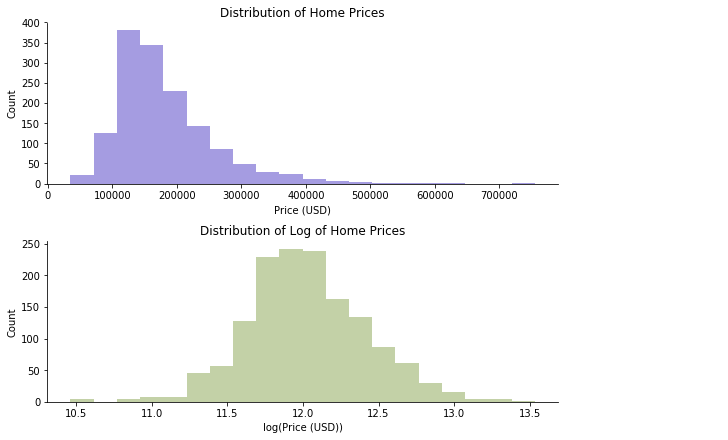

In [9]:
# Establish figure and grid to create two charts in the same image
home_prices_fig = plt.figure(constrained_layout=True,figsize=(10,6))
home_prices_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=home_prices_fig)

# Create histogram for housing price data
ax1 = home_prices_fig.add_subplot(home_prices_grid[0,:2])
ax1.set_title("Distribution of Home Prices")
training_data["SalePrice"].hist(bins=20,color="slateblue",alpha=0.6)
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.grid(False)
sns.despine()

# Create histogram for log of housing price data
ax2 = home_prices_fig.add_subplot(home_prices_grid[1, :2])
ax2.set_title("Distribution of Log of Home Prices")
np.log(training_data["SalePrice"]).hist(bins=20,color="olivedrab",alpha=0.4)
plt.xlabel("log(Price (USD))")
plt.ylabel("Count")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

In [10]:
print("------------------------------------------------------------------")
print(f"Skew of the housing price data is: {round(training_data['SalePrice'].skew(),3)}")
print(f"Skew of the log of housing price data is: {round(np.log(training_data['SalePrice']).skew(),3)}")
print("------------------------------------------------------------------")
print("Logarithmic transformation significantly improves the skew issue")
print("------------------------------------------------------------------")

------------------------------------------------------------------
Skew of the housing price data is: 1.883
Skew of the log of housing price data is: 0.121
------------------------------------------------------------------
Logarithmic transformation significantly improves the skew issue
------------------------------------------------------------------


In [5]:
# Create a square feet variable
training_data["SF"] = training_data["1stFlrSF"] + training_data["2ndFlrSF"]

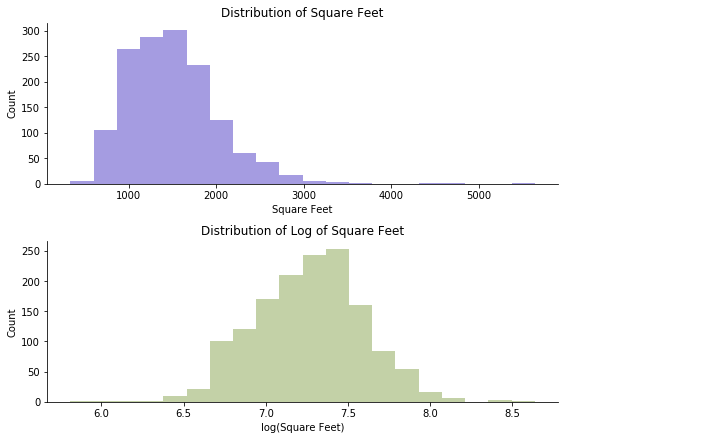

In [7]:
# Establish figure and grid to create two charts in the same image
sf_fig = plt.figure(constrained_layout=True,figsize=(10,6))
sf_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=sf_fig)

# Create histogram for housing price data
ax1 = sf_fig.add_subplot(sf_grid[0,:2])
ax1.set_title("Distribution of Square Feet")
training_data["SF"].hist(bins=20,color="slateblue",alpha=0.6)
plt.xlabel("Square Feet")
plt.ylabel("Count")
plt.grid(False)
sns.despine()

# Create histogram for log of housing price data
ax2 = sf_fig.add_subplot(sf_grid[1, :2])
ax2.set_title("Distribution of Log of Square Feet")
np.log(training_data["SF"]).hist(bins=20,color="olivedrab",alpha=0.4)
plt.xlabel("log(Square Feet)")
plt.ylabel("Count")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

In [8]:
print("------------------------------------------------------------------")
print(f"Skew of the housing price data is: {round(training_data['SF'].skew(),3)}")
print(f"Skew of the log of housing price data is: {round(np.log(training_data['SF']).skew(),3)}")
print("------------------------------------------------------------------")
print("Logarithmic transformation significantly improves the skew issue")
print("------------------------------------------------------------------")

------------------------------------------------------------------
Skew of the housing price data is: 1.33
Skew of the log of housing price data is: -0.035
------------------------------------------------------------------
Logarithmic transformation significantly improves the skew issue
------------------------------------------------------------------


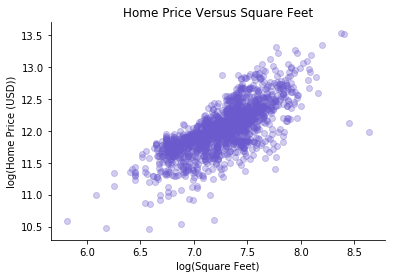

In [11]:
# Show a scatter plot compaing home price and home square feet
plt.scatter(np.log(training_data['SF']),np.log(training_data['SalePrice']),color="slateblue",alpha=0.3)
plt.title("Home Price Versus Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()

In [12]:
training_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1710
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1262
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1786
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2198


In [13]:
# Separate x and y variables
# Matrix of independent variable (square feet data)
X = np.log(training_data.iloc[:,-1:].values)
# Vector of dependent variable (home sale price)
y = np.log(training_data.iloc[:,-2].values)

In [14]:
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)

In [15]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

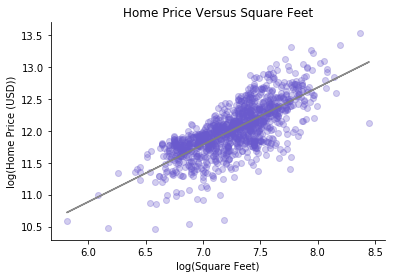

In [17]:
# Visualizing the training set results
# scatter plot of the actual training results
plt.scatter(X_train, y_train, color = "slateblue", alpha=0.3)
# line plot of the predictions
plt.plot(X_train, regressor.predict(X_train), color = "grey",alpha=0.9)
# Add titles and labels
plt.title("Home Price Versus Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()
# specifies that it's the end of the graph and that we're ready to plot it
plt.show()

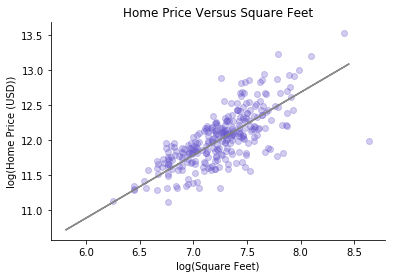

In [18]:
# Visualizing the training set results
# scatter plot of the actual training results
plt.scatter(X_test, y_test, color = "slateblue", alpha=0.3)
# line plot of the predictions
plt.plot(X_train, regressor.predict(X_train), color = "grey", alpha=0.9)
# Add titles and labels
plt.title("Home Price Versus Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()
# specifies that it's the end of the graph and that we're ready to plot it
plt.show()

In [22]:
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     1735.
Date:                Sat, 04 May 2019   Prob (F-statistic):          1.91e-250
Time:                        18:59:32   Log-Likelihood:                -159.14
No. Observations:                1460   AIC:                             322.3
Df Residuals:                    1458   BIC:                             332.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6176      0.154     36.485      0.000       5.316       5.920
x1             0.8819      0.021     41.652      0.000       0.840       0.923
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.971
Skew:                          -0.564   Prob(JB):                     7.58e-43
Kurtosis:                       4.384   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""